## <center>Методи та технології аналітики даних</center>
## <center>Лабораторна робота №5</center>
#### <center>ФБ-25 Кравченко Максим</center>

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

In [43]:
file_name = r'..\Dataset\adult_cleaned.data'
headers = ['Age', 'Work_class', 'Final_weight', 'Education', 'Education_num', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Capital_gain', 'Capital_loss', 
           'Hours_per_week', 'Native_country', 'Income']
df = pd.read_csv(file_name, sep=",", header=1, names=headers, na_values='?')
df_limited = df.head(3000)
df

,Age,Work_class,Final_weight,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
1,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
2,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
3,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
4,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30154,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30155,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30156,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30157,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


Нормалізуємо дані, тому що метод найближчих сусідів чутливий до масштабування даних

In [44]:
columns_to_use = ['Age', 'Hours_per_week']
df_selected = df_limited[columns_to_use]
df_selected.head()

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)

df_scaled = pd.DataFrame(df_scaled, columns=columns_to_use)
df_scaled

,Age,Hours_per_week
0,1.091894,-0.112382
1,-0.826177,-0.112382
2,-0.135672,-0.112382
3,0.785002,-2.182873
4,1.015171,0.318971
...,...,...
2995,-0.672731,0.750323
2996,2.626350,-2.700496
2997,-0.058949,-0.112382
2998,-0.672731,0.750323


In [45]:
X = df_scaled
y = (df_limited['Income'] == '>50K').astype(int)

Поділіть вибірку на тестову і навчальну

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

accuracies = []

for k in range(1, 200):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"k={k}, Точність: {accuracy:.2f}")
    if accuracy >= 0.85:
        print(f"Оптимальне k: {k}")
        break

k=1, Точність: 0.66
k=2, Точність: 0.71
k=3, Точність: 0.68
k=4, Точність: 0.72
k=5, Точність: 0.69
k=6, Точність: 0.73
k=7, Точність: 0.73
k=8, Точність: 0.74
k=9, Точність: 0.73
k=10, Точність: 0.72
k=11, Точність: 0.71
k=12, Точність: 0.71
k=13, Точність: 0.70
k=14, Точність: 0.71
k=15, Точність: 0.69
k=16, Точність: 0.72
k=17, Точність: 0.71
k=18, Точність: 0.72
k=19, Точність: 0.72
k=20, Точність: 0.73
k=21, Точність: 0.72
k=22, Точність: 0.73
k=23, Точність: 0.72
k=24, Точність: 0.73
k=25, Точність: 0.73
k=26, Точність: 0.73
k=27, Точність: 0.73
k=28, Точність: 0.74
k=29, Точність: 0.74
k=30, Точність: 0.73
k=31, Точність: 0.73
k=32, Точність: 0.74
k=33, Точність: 0.72
k=34, Точність: 0.74
k=35, Точність: 0.73
k=36, Точність: 0.73
k=37, Точність: 0.73
k=38, Точність: 0.73
k=39, Точність: 0.73
k=40, Точність: 0.73
k=41, Точність: 0.73
k=42, Точність: 0.74
k=43, Точність: 0.74
k=44, Точність: 0.74
k=45, Точність: 0.74
k=46, Точність: 0.74
k=47, Точність: 0.74
k=48, Точність: 0.74
k

порахувати точність для тестової вибірки


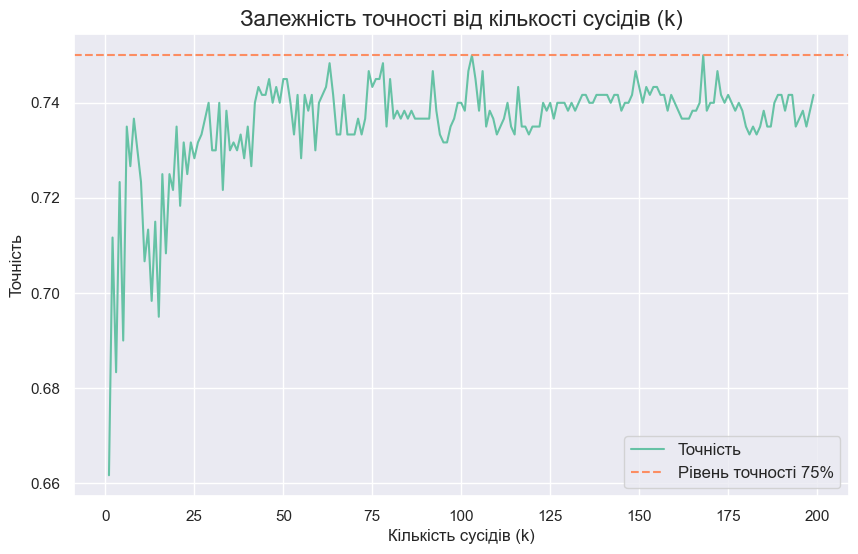

In [47]:
# Встановлюємо стиль та палітру Seaborn
sns.set_theme(style="darkgrid")
sns.set_palette("Set2")

# Малюємо графік
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(accuracies) + 1), accuracies, label="Точність", color=sns.color_palette("Set2")[0])
plt.axhline(y=0.75, color=sns.color_palette("Set2")[1], linestyle="--", label="Рівень точності 75%")
plt.title("Залежність точності від кількості сусідів (k)", fontsize=16)
plt.xlabel("Кількість сусідів (k)", fontsize=12)
plt.ylabel("Точність", fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

In [48]:
model = KNeighborsClassifier(n_neighbors=63)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Точність: {accuracy:.2f}")

Точність: 0.75


зробити крос валідацію на 3 блоках

In [49]:
x = scaler.fit_transform(df_selected)
kf = KFold(n_splits=3, shuffle=True, random_state=42)

accuracies = []

for train_index, test_index in kf.split(x):
    X_train, X_test = x[train_index], x[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model = KNeighborsClassifier(n_neighbors=3)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"Точність на ітерації: {accuracy:.2f}")

mean_accuracy = np.mean(accuracies)
print(f"Середня точність: {mean_accuracy:.2f}")

Точність на ітерації: 0.71
Точність на ітерації: 0.71
Точність на ітерації: 0.70
Середня точність: 0.71


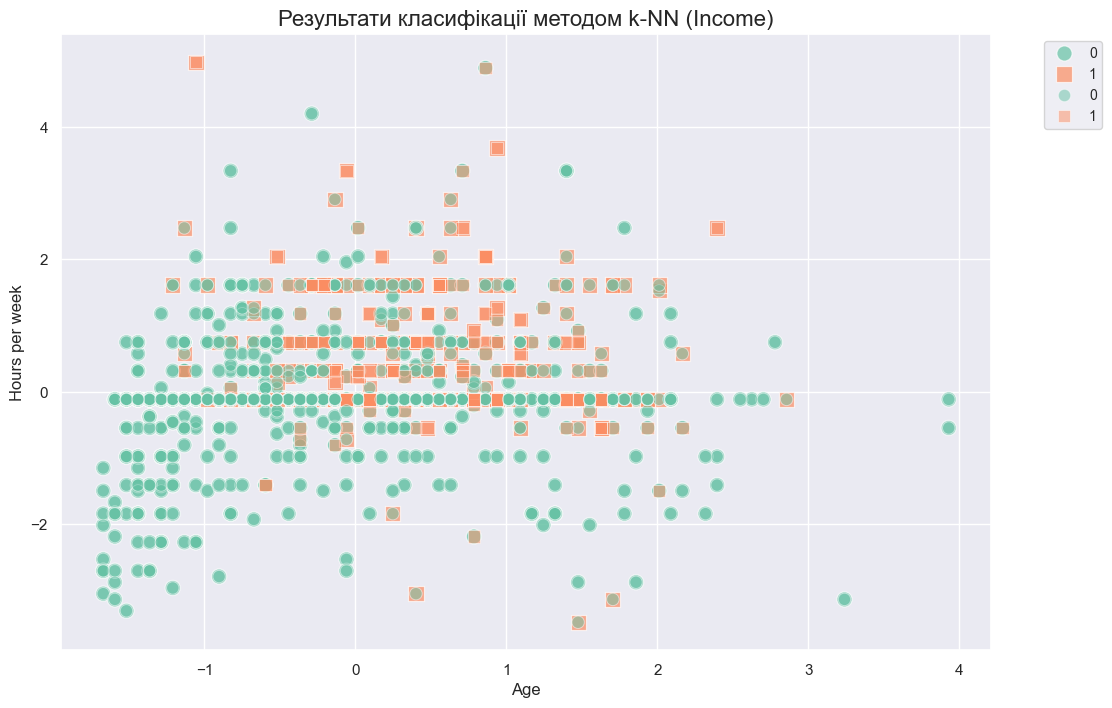

In [50]:
df_plot = pd.DataFrame(X_test, columns=columns_to_use)
df_plot['True Label'] = y_test.values
df_plot['Predicted Label'] = y_pred

sns.set_palette("Set2")
plt.figure(figsize=(12, 8))

sns.scatterplot(
    data=df_plot,
    x='Age',
    y='Hours_per_week',
    hue='True Label',
    style='True Label',
    s=120,
    legend='full',
    alpha=0.7,
    markers=['o', 's']
)

sns.scatterplot(
    data=df_plot,
    x='Age',
    y='Hours_per_week',
    hue='Predicted Label',
    style='Predicted Label',
    s=80,
    alpha=0.5,
    markers=['o', 's']
)

plt.title('Результати класифікації методом k-NN (Income)', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Hours per week', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.show()